# Задание
1 Загрузите файл HR.csv в pandas dataframe5










10 Загрузить jupyter notebook с решение на github и прислать ссылку5

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [398]:
df = pd.read_csv('C:\\netology\\net2020\\HR\\HR_2.csv')

2 Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).10

In [370]:
df.describe().append(df.mode().rename(index = lambda row: "mode" + str(row+1)))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,NaN,NaN
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,NaN,NaN
mode1,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000,sales,low
mode2,NaN,NaN,NaN,156.000000,NaN,NaN,NaN,NaN,NaN,NaN



3 Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.10

In [372]:
cm = df.loc[:,['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()
cm 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


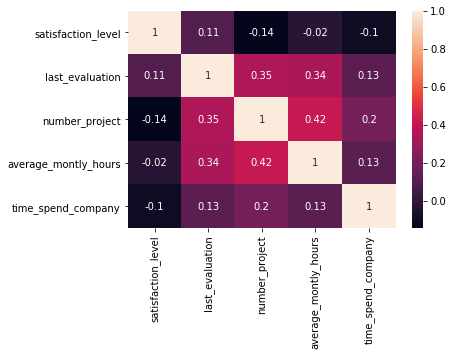

In [374]:
sns.heatmap(cm,annot=True)


4 Рассчитайте сколько сотрудников работает в каждомдепартаменте.5

In [376]:
df[['department','satisfaction_level']]\
    .rename(columns={'satisfaction_level':'count'})\
    .groupby(['department']).count()\
    .sort_values(by = ['count'], ascending = False)

,count
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739



5 Показать распределение сотрудников по зарплатам.5


In [401]:
res = df
res['percent'] = res.groupby(['salary'])['salary'].transform('count') / res['salary'].count() * 100
res[['salary','percent']].groupby(['salary']).max().sort_values('percent',ascending=False)

,percent
salary,
low,48.776585
medium,42.976198
high,8.247216



6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности5

In [403]:
res['perc_salary_per_dep'] = res.groupby(['salary','department'])['salary'].transform('count') / res.groupby('department')['salary'].transform('count') * 100 
res[['department','salary','perc_salary_per_dep']].groupby(['department','salary']).agg('max')

perc_salary_per_dep
department  salary                     
IT          high               6.764466
            low               49.633252
            medium            43.602282
RandD       high               6.480305
            low               46.251588
            medium            47.268107
accounting  high               9.647979
            low               46.675359
            medium            43.676662
hr          high               6.089310
            low               45.331529
            medium            48.579161
management  high              35.714286
            low               28.571429
            medium            35.714286
marketing   high               9.324009
            low               46.853147
            medium            43.822844
product_mng high               7.538803
            low               50.000000
            medium            42.461197
sales       high               6.497585
            low               50.700483
            medium            42.801932
support     high               6.325707
            low               51.413190
            medium            42.261104
technical   high               7.389706
            low               50.441176
            medium            42.169118

7 Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низкимокладом10



8 Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
    ●Доля сотрудников с повышением за последние 5 лет
    ●Средняя степень удовлетворенности
    ●Среднее количество проектов

In [404]:
res['perc_per_left'] = res.groupby(['left','promotion_last_5years'])['salary'].transform('count') / res.groupby('left')['salary'].transform('count') * 100 
res.groupby(['left','promotion_last_5years']).agg({'number_project':'mean','satisfaction_level':'mean','perc_per_left':'max'})

number_project  satisfaction_level  perc_per_left
left promotion_last_5years                                                   
0    0                            3.786395            0.666766      97.374869
     1                            3.796667            0.668433       2.625131
1    0                            3.859797            0.439992      99.467936
     1                            3.052632            0.460000       0.532064

9 Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department иsalary)Оценить качество модели на тестовой выборки20

In [399]:
df_train, df_test = train_test_split(df, test_size = 0.5)
y_train, y_test = df_train['left'], df_test['left']

In [406]:
for df_ in [df_train,df_test]:
    for col in df_.columns:
        if df_[col].dtype == 'O' or df_[col].name == 'left':
            del(df_[col]) 
            # print(df_[col].name)
df_train


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
13935,0.73,0.48,3,211,7,0,0
2083,0.25,0.65,5,220,3,0,0
9290,0.77,0.40,4,207,5,0,0
876,0.91,0.94,5,257,5,0,0
2393,0.33,0.40,4,212,2,1,0
...,...,...,...,...,...,...,...
3211,0.58,0.90,4,175,3,1,0
5806,1.00,0.71,4,216,2,0,0
10898,0.88,0.85,3,220,3,0,0
11674,0.95,0.77,5,199,10,1,0


In [407]:
lda = LinearDiscriminantAnalysis()
lda.fit(df_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [408]:
lda.predict(df_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [409]:
pd.DataFrame([y_test.values, lda.predict(df_test)])

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,1,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [410]:
accuracy_score(y_test, lda.predict(df_test))

0.7674666666666666

In [411]:
lda.coef_

array([[-4.24419464,  0.74691149, -0.23522796,  0.00431997,  0.24325369,
        -1.00108239, -1.05916873]])